# 2 sigma challenge

In [1]:
#import the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
train = pd.read_json("train.json")
train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [3]:
test = pd.read_json("test.json")
print ("train has ",train.shape[0],"rows and ",train.shape[1],"columns")
print ("test has ",test.shape[0],"rows and ",test.shape[1],"columns")
print ("train test data ratio is ",train.shape[1]/(test.shape[1]+train.shape[1]))
train.columns
test.columns

train has  49352 rows and  15 columns
test has  74659 rows and  14 columns
train test data ratio is  0.5172413793103449


Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address'],
      dtype='object')

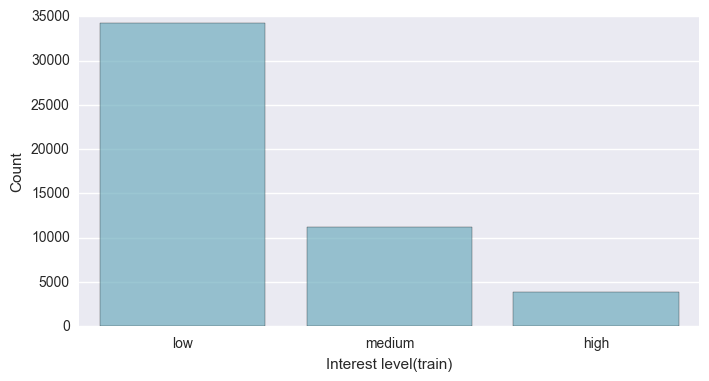

In [4]:
#Plotting the Target variable : Interest level in train

train_int_counts=train['interest_level'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(train_int_counts.index, train_int_counts.values , alpha = 0.7, color = sns.color_palette()[5])
plt.ylabel('Count')
plt.xlabel('Interest level(train)')
plt.show()

In [5]:
#Basic new features train

train["num_photos"]= train["photos"].apply(len)
train["num_features"]= train["features"].apply(len)
train["num_description_words"] = train["description"].apply(lambda x: len(x.split(" ")))
train["created"] = pd.to_datetime(train["created"])
train["created_year"] = train["created"].dt.year
train["created_month"] = train["created"].dt.month
train["created_day"] = train["created"].dt.day

In [6]:
import nltk
# nltk.download()
#un-comment and download files if any nltk support files are not present in your system

In [8]:
# nltk sentiments of the description column as features
from nltk.sentiment.vader import SentimentIntensityAnalyzer
train["description"]=train["description"].astype('str')
sid = SentimentIntensityAnalyzer()  
def get_sentiment(line):
    ss = sid.polarity_scores(line["description"])
#     print(ss)
    return pd.Series(ss)
train[["neu","pos","compound","neg"]]=train.apply(get_sentiment, axis=1)

In [64]:
# features= ["bathrooms","bedrooms","latitude", "longitude", "price",
#              "num_photos", "num_features", "num_description_words",
#              "created_year", "created_month", "created_day","neu","pos","compound","neg"]
features= ["bathrooms","bedrooms","latitude", "longitude", "price",
             "num_photos", "num_features", "num_description_words",
             "created_year", "created_month", "created_day"]

# train.head()

In [18]:
import sklearn

In [65]:
#select x and Y
x= train[features]
y=train["interest_level"]
# split train into train and validation
from sklearn.cross_validation import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2)

In [29]:
#basic xgb model
#params
# import xgboost as xgb
# param = {}
# param['objective'] = 'multi:softprob'
# param['eta'] = 0.1
# param['max_depth'] = 6
# param['silent'] = 1
# param['num_class'] = 3
# param['eval_metric'] = "mlogloss"
# param['min_child_weight'] = 1
# param['subsample'] = 0.7
# param['colsample_bytree'] = 0.7
# param['seed'] = 0
# param_list = list(param.items())

# #martix
# import xgboost.sklearn as xgb
# xgtrain = xgb.DMatrix(x_train, label = y_train)
# xgtest = xgb.DMatrix(x_val,label = y_val)


# # model = xgb.train(param_list,xgtrain,100)

# from xgboost.sklearn import XGBClassifier
# model = XGBClassifier(**param).fit(x_train, y_train)



ImportError: No module named 'xgboost'

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
cls = RandomForestClassifier(n_estimators=1500)
cls.fit(x_train,y_train)
cls
y_train_pred = cls.predict_proba(x_train)

# log_loss(y_train,y_train_pred)
#to be added
# xgboost
# manager skill
# building level
# location mapping
# stacking



MemoryError: 

In [67]:
log_loss(y_train,y_train_pred)

0.15494389317129192

In [68]:
y_test_pred = cls.predict_proba(x_val)

In [69]:
log_loss(y_val,y_test_pred)

0.62643637216746284

In [56]:
#Basic new features train

test["num_photos"]= test["photos"].apply(len)
test["num_features"]= test["features"].apply(len)
test["num_description_words"] = test["description"].apply(lambda x: len(x.split(" ")))
test["created"] = pd.to_datetime(test["created"])
test["created_year"] = test["created"].dt.year
test["created_month"] = test["created"].dt.month
test["created_day"] = test["created"].dt.day

In [57]:
# nltk sentiments of the description column as features
from nltk.sentiment.vader import SentimentIntensityAnalyzer
test["description"]=test["description"].astype('str')
sid = SentimentIntensityAnalyzer()  
def get_sentiment(line):
    ss = sid.polarity_scores(line["description"])
#     print(ss)
    return pd.Series(ss)
test[["neu","pos","compound","neg"]]=test.apply(get_sentiment, axis=1)

In [70]:
x_test= test[features]
y_pred_test = cls.predict_proba(x_test)

In [71]:
labels2idx = {label: i for i, label in enumerate(cls.classes_)}
labels2idx

{'high': 0, 'low': 1, 'medium': 2}

In [72]:
sub = pd.DataFrame()
sub["listing_id"] = test["listing_id"]
for label in ["high", "medium", "low"]:
    sub[label] = y_pred_test[:, labels2idx[label]]
sub.to_csv("submission_rf.csv", index=False)